# Aim of this notebook
The goal of this notebook is to automate the retrieveing of RDF metadata through the [FAIR-Checker tool](https://fair-checker.france-bioinformatique.fr). 

To run this notebook you just need the `requests`, `RDFlib`, `pandas` and `seaborn` python libraries. 

The FAIR-Checker API is better described at https://fair-checker.france-bioinformatique.fr/swagger.

Please report any issue at https://github.com/IFB-ElixirFr/fair-checker/issues or contact alban.gaignard@univ-nantes.fr. 

In [1]:
import requests
import json
import pandas as pd
from rdflib import ConjunctiveGraph
import seaborn 

## Input dataset

In [2]:
urls = ["http://bio.tools/bwa",
        "https://workflowhub.eu/workflows/447",
        "https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HYPW4B", 
        "https://tess.elixir-europe.org/materials/discover-drug-targets-with-europe-pmc-machine-learning-dataset-and-open-targets"
       ]

In [3]:
FC_get_md = "https://fair-checker.france-bioinformatique.fr/api/inspect/get_rdf_metadata"

In [4]:
knowledge_graph = ConjunctiveGraph()

for u in urls:
    res = requests.get(url=FC_get_md, params={"url": u})
    try:
        knowledge_graph.parse(data=res.text, format="json-ld")
    except Exception as e:
            print(e)
        
    print(f"Loaded {len(knowledge_graph)} RDF triples from {u}")

Loaded 124 RDF triples from http://bio.tools/bwa
Loaded 152 RDF triples from https://workflowhub.eu/workflows/447
Loaded 260 RDF triples from https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HYPW4B
Loaded 267 RDF triples from https://tess.elixir-europe.org/materials/discover-drug-targets-with-europe-pmc-machine-learning-dataset-and-open-targets


In [5]:
classes_counts = """
SELECT ?c (count(?c) as ?count) WHERE {
    ?s rdf:type ?c .
}
GROUP BY ?c
ORDER BY DESC(?count)
"""

# Classes
res_classes = knowledge_graph.query(classes_counts)
df_classes = pd.DataFrame(res_classes, columns=["class", "count"])
df_classes["class"] = df_classes["class"].astype("str")
df_classes["count"] = df_classes["count"].astype("int")
df_classes

,class,count
0,http://schema.org/CreativeWork,21
1,http://bioschemas.org/types/FormalParameter,13
2,http://schema.org/Organization,6
3,http://schema.org/DataDownload,4
4,http://schema.org/DataCatalog,2
5,schema:Person,1
6,http://schema.org/SoftwareApplication,1
7,http://schema.org/Person,1
8,http://schema.org/ComputerLanguage,1
9,http://schema.org/Project,1


In [6]:
property_counts = """
SELECT ?p (count(?p) as ?count) WHERE {
    ?s ?p ?o .
}
GROUP BY ?p
ORDER BY DESC(?count)
"""

res_props = knowledge_graph.query(property_counts)
df_props = pd.DataFrame(res_props, columns=["prop", "count"])
df_props["prop"] = df_props["prop"].astype("str")
df_props["count"] = df_props["count"].astype("int")
df_props

,prop,count
0,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,55
1,http://schema.org/name,40
2,http://schema.org/citation,29
3,http://schema.org/identifier,21
4,http://schema.org/sameAs,19
5,http://schema.org/text,14
6,http://bioschemas.org/input,13
7,http://schema.org/description,7
8,http://bioschemas.org/output,6
9,http://schema.org/url,6


<AxesSubplot:xlabel='class', ylabel='count'>

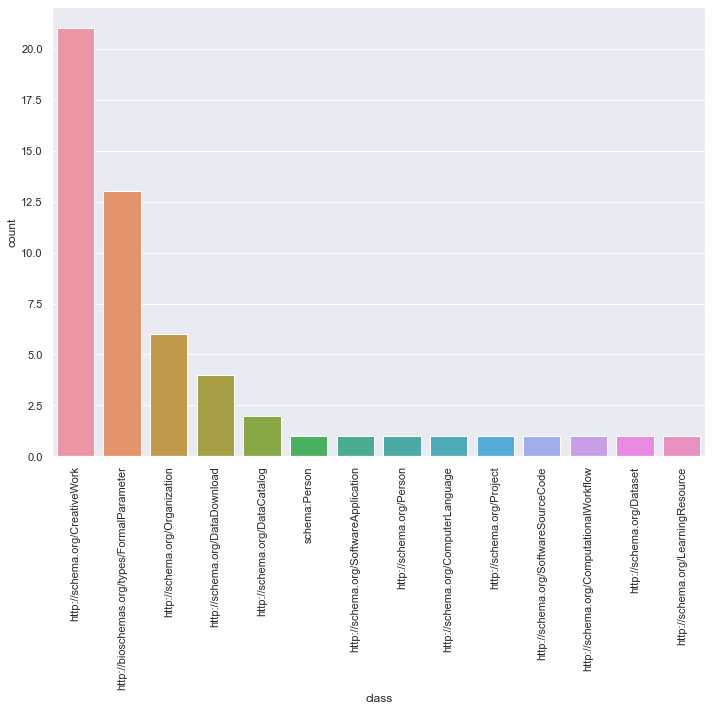

In [7]:
seaborn.set(rc={'figure.figsize':(11.7,8.27)})

ax = seaborn.barplot(x=df_classes["class"], y=df_classes["count"])
ax.tick_params(axis='x', rotation=90)
ax

<AxesSubplot:xlabel='prop', ylabel='count'>

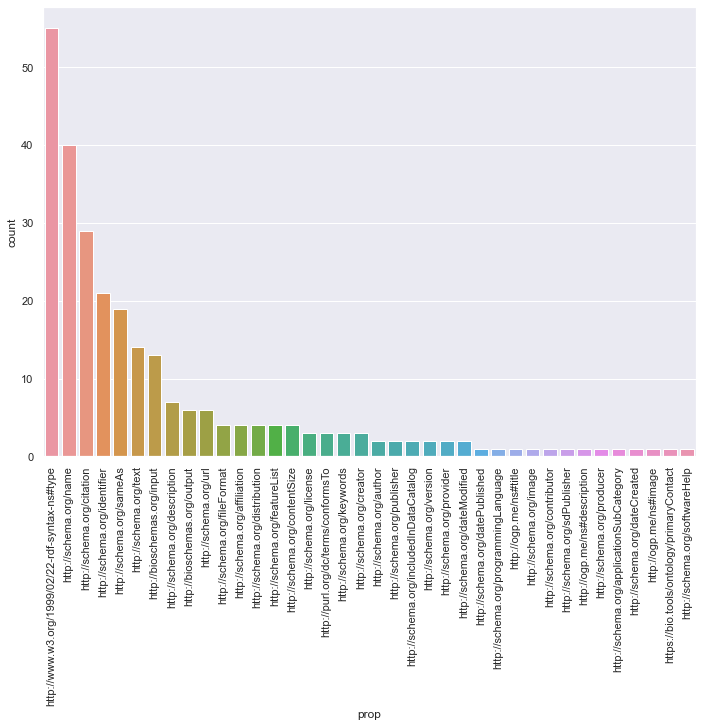

In [8]:
ax = seaborn.barplot(x=df_props["prop"], y=df_props["count"])
ax.tick_params(axis='x', rotation=90)
ax